# Oral Centrale math-info 2022

## Séance 1

### Exercice 1

In [10]:
import numpy as np
import numpy.random as rd

def diag(n):
    d = np.zeros((n, n))
    for i in range(n):
        d[i][i] = rd.random()
    return d

diag(5)

array([[0.86040586, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.23173524, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.62674713, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5336602 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.37403207]])

In [14]:
def Matrice(A, B):
    return A.dot(B) - B.dot(A)

Matrice(diag(5), rd.rand(5, 5)) # les coefficients diagonaux sont nuls

array([[ 0.        ,  0.15509269, -0.07210969,  0.38217954,  0.2586713 ],
       [-0.19518778,  0.        , -0.37742918,  0.08915017,  0.10505834],
       [ 0.04596801,  0.14851381,  0.        ,  0.1502675 ,  0.27330591],
       [-0.16884362, -0.12372888, -0.62444703,  0.        , -0.00582513],
       [-0.34731733, -0.12645154, -0.48697056,  0.04294939,  0.        ]])

### Exercice 2

In [25]:
def temps(a, b):
    Sn = 0
    T = 0
    while -a <= Sn <= b:
        T += 1
        if rd.random() < 0.5:
            Sn += 1
        else:
            Sn -= 1
    return T

temps(5, 7)

44

In [29]:
def moyenne(a, b):
    m = 0
    for i in range(10000):
        m += temps(a, b)
    return m / 10000

moyenne(5, 7)

48.1566

### Exercice 3

In [34]:
def S(a):
    s = 0
    for k in range(1, 1001*a):
        s += a/(k**2 + a**2)
    return s

S(1), S(5)

(1.075674547634752, 1.4697972263214525)

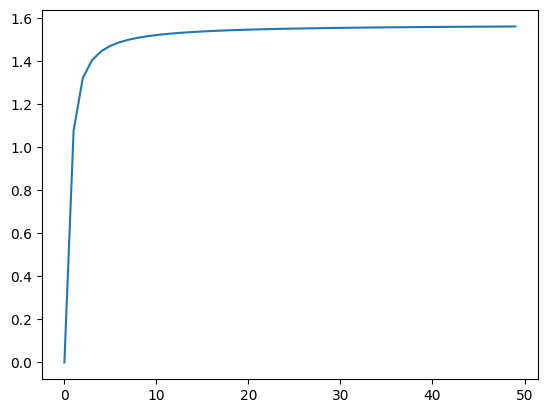

1.5707963267948966

In [38]:
import matplotlib.pyplot as plt

X = [i for i in range(50)]
Y = [S(x) for x in X]
plt.plot(X, Y)
plt.show()
np.pi/2

### Exercice 4

In [45]:
def f(x):
    return x**2*np.sin(1/x)
def fp(x):
    return 2*x*np.sin(1/x) - np.cos(1/x)

def g(x):
    return f(x) + 2*x
def gp(x):
    return fp(x) + 2

def h(x):
    return f(x) + x
def hp(x):
    return fp(x) + 1

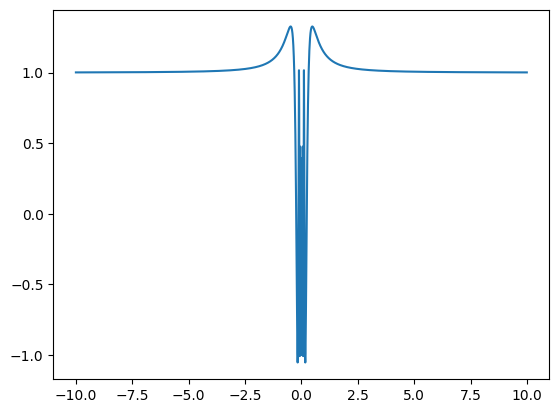

In [42]:
X = np.arange(-10, 10, 0.01)
Y = [fp(x) for x in X]
plt.plot(X, Y)
plt.show()

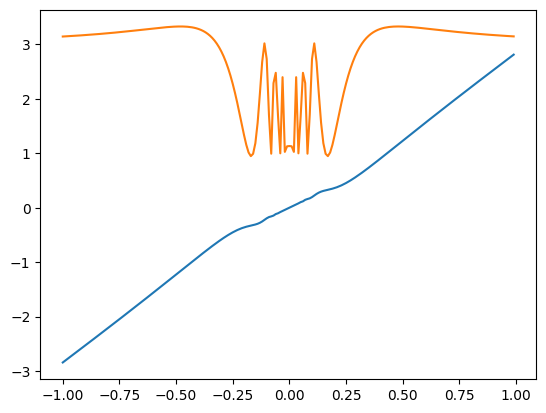

In [44]:
X = np.arange(-1, 1, 0.01)
Y_G = [g(x) for x in X]
Y_GP = [gp(x) for x in X]
plt.plot(X, Y_G)
plt.plot(X, Y_GP)
plt.show()

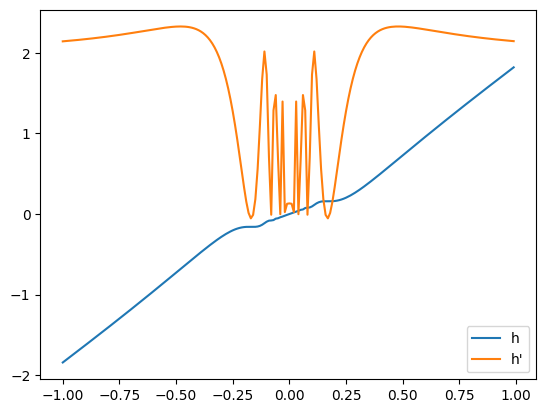

In [62]:
Y_H = [h(x) for x in X]
Y_HP = [hp(x) for x in X]
plt.plot(X, Y_H)
plt.plot(X, Y_HP)
plt.legend(['h', 'h\''])
plt.show()

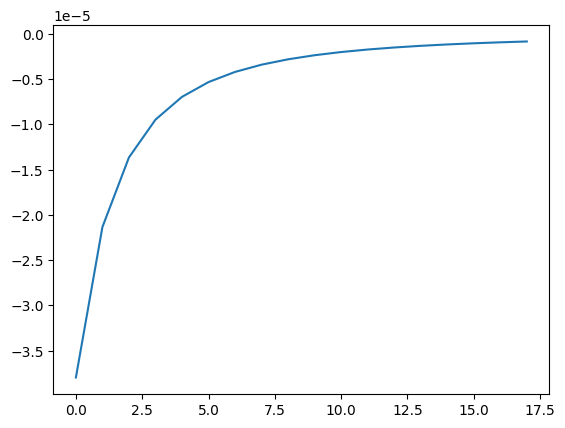

In [65]:
N = range(18)
Y_Hp = []
for n in N:
    n = 30 + 10*n
    Un = 2*n*np.pi - 0.5/n
    Y_Hp.append(hp(1/Un))
plt.plot(N, Y_Hp)
# plt.plot([0, 17], [0, 0])
plt.show()

## Séance 2

### Exercice 1

/home/qfortier/.local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


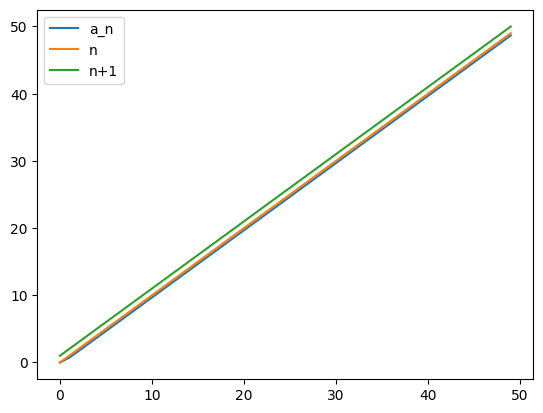

In [118]:
import scipy.optimize as resol

def fact(n):
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

def f(n):
    def aux(x):
        s = 0
        for k in range(n):
            s += float(x**k/fact(k))*np.exp(-x)
        return s - 1/2
    return aux

X = range(50)
a = [resol.fsolve(f(n), n) for n in X]
plt.plot(X, a)
plt.plot(X, X)
plt.plot(X, list(X)[1:] + [50])
plt.legend(['a_n', 'n', 'n+1'])
plt.show()

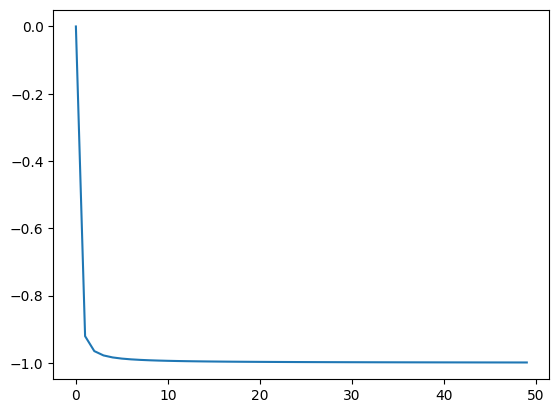

In [120]:
plt.plot(X, [3*(a[n] - n) for n in X])
plt.show() # on conjecture 3(an - n) -> -1, donc an = n - 1/3 + o(1)

### Exercice 2

In [124]:
def U(n):
    m  = 0
    for i in range(1000):
        M = np.random.randint(0, 2, (n, n))
        m = max(m, np.linalg.norm(M))
    return m

def V(n):
    m  = 0
    for i in range(1000):
        M = np.random.random((n, n))
        m = max(m, np.linalg.norm(M))
    return m

[U(n) for n in range(11)], [V(n) for n in range(11)]

([0,
  1.0,
  2.0,
  3.0,
  3.872983346207417,
  4.58257569495584,
  5.196152422706632,
  5.830951894845301,
  6.708203932499369,
  7.615773105863909,
  8.0],
 [0,
  0.9999957281181036,
  1.8329572727608172,
  2.513697512185055,
  2.9705330613626346,
  3.6153674345139435,
  4.124972651809607,
  4.719875474288955,
  5.2299206214403196,
  5.984343294193167,
  6.53540829755789])

In [166]:
def M(n, p):
    X = []
    for i in range(n):
        if rd.random() < p:
            X.append(1)
        else:
            X.append(0)
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            m[i][j] = X[i]*X[j]
    return m

k = 0
for i in range(1000):
    if np.trace(M(5, 0.5)) <= 1:
        k += 1
k/1000

0.216

### Exercice 3

In [167]:
def D1(n, a, b):
    if n == 2:
        return a**2 -2*b
    if n == 3:
        return a**3 - 3*a*b
    return a*D1(n-1, a, b) - b*D1(n-2, a, b)

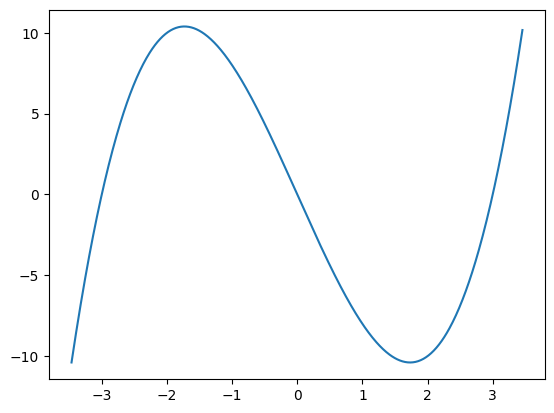

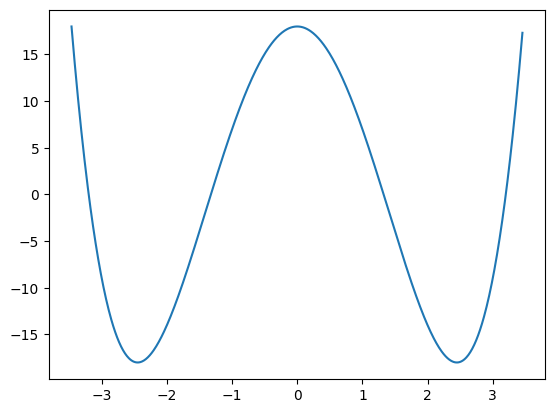

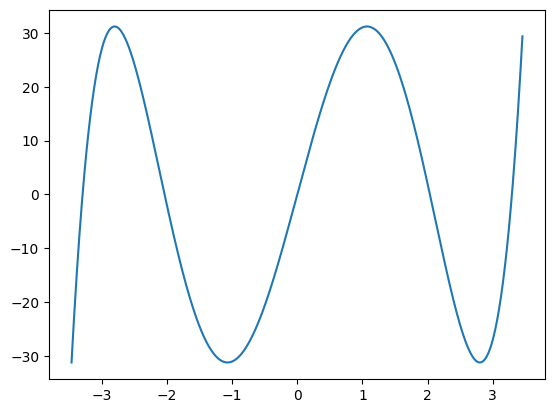

In [170]:
b = 3
for n in range(3, 6):
    X = np.arange(-2*b**.5, 2*b**.5, 0.01)
    Y = [D1(n, x, b) for x in X]
    plt.plot(X, Y)
    plt.show()
# a -> Dn(a, b) semble avoir n racines simples

### Exercice 4

In [180]:
def A(n):
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if abs(i-j) == 1:
                M[i][j] = 1
    return M

def P(n):
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i][j] = np.sin((i + 1)*(j + 1)*np.pi/(n+1))
    return M

In [181]:
def B(n):
    p = P(n)
    return np.linalg.inv(p).dot(A(n)).dot(p)

B(3), B(4), B(5)

(array([[ 1.41421356e+00,  1.11022302e-16, -7.85046229e-17],
        [ 4.59869434e-17, -1.23259516e-32,  2.68031548e-16],
        [-3.00549228e-16,  1.11022302e-16, -1.41421356e+00]]),
 array([[ 1.61803399e+00,  8.58762917e-17,  1.62719828e-16,
          9.97475620e-18],
        [ 2.21949412e-16,  6.18033989e-01,  2.42466058e-16,
         -2.44746987e-16],
        [ 2.18771489e-16,  7.77863339e-17, -6.18033989e-01,
          1.74764570e-16],
        [-1.55951271e-16, -4.11007160e-16,  1.60002919e-16,
         -1.61803399e+00]]),
 array([[ 1.73205081e+00,  1.31403490e-16, -1.11022302e-16,
          4.55882793e-16,  4.65558222e-16],
        [-2.34617731e-17,  1.00000000e+00,  1.11022302e-16,
         -1.17935829e-17, -4.93313798e-16],
        [ 1.81941580e-16, -4.85988356e-17, -1.23259516e-32,
          4.75492987e-17,  8.57934461e-17],
        [-2.26338407e-16, -5.74412155e-17,  1.11022302e-16,
         -1.00000000e+00, -8.95532900e-17],
        [ 1.43071681e-16,  2.51730245e-16, -1.110